In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

/home/michal/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
boston = load_boston()

In [17]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [18]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [38]:
df['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [41]:
def binary_split(row):
    if row['ZN'] > np.mean(df["ZN"]):
        return 1
    else:
        return 2

In [46]:
a =\
(df
 .iloc[:,0:3]
 .assign(var1 = df.apply(binary_split, axis = 1))
)

### Softmax

In [52]:
import numpy as np
def softmax(scores):
    return np.exp(scores) / np.sum(np.exp(scores), axis=0)

scores = [8, 5, 2]

In [53]:
softmax(scores)

array([0.95033021, 0.04731416, 0.00235563])

In [54]:
np.exp([1,2,3,4,5])

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [56]:
2.71828183**2

7.389056107308149

In [57]:
scores

[8, 5, 2]

In [ ]:
if __name__ == "__main__":
    logits = [8, 5, 2]
    print(Softmax ", softmax(logits))

### CLT

In [62]:
from sklearn.datasets import load_iris
import random

In [109]:
iris = load_iris()
d = pd.DataFrame(iris.data, columns = iris.feature_names)
d.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [102]:
%%time
sl = d.iloc[:,0].tolist()
#sl = [(n - np.mean(sl)/np.std(sl)) for n in sl]
sl_sample_means = []
sl_sample_sd = []
for idx in range(100000):
    sl_sample = random.choices(population=sl, k=len(sl))
    sl_sample_means.append(np.mean(sl_sample))
    sl_sample_sd.append(np.std(sl_sample))

CPU times: user 8.15 s, sys: 0 ns, total: 8.15 s
Wall time: 8.15 s


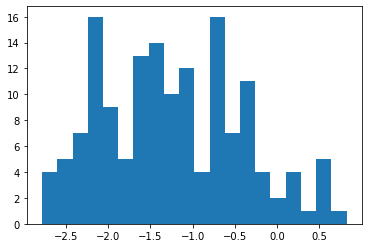

In [104]:
plt.hist(sl, bins = 20)
plt.show()

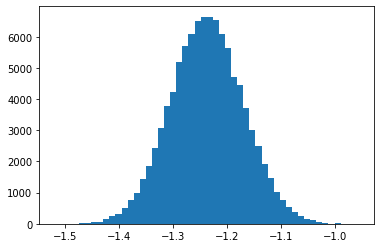

In [105]:
plt.hist(sl_sample_means, bins=50)
plt.show()

In [106]:
print(np.mean(sl))
print(np.mean(sl_sample_means))

-1.2369092295906905
-1.237059842924024


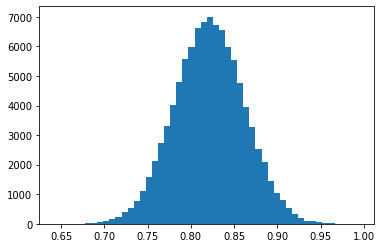

In [107]:
plt.hist(sl_sample_sd, bins=50)
plt.show()

In [108]:
print(np.std(sl))
print(np.mean(sl_sample_sd))

0.8253012917851409
0.8213865389040917
